# Data Wrangling & Cleaning - Titanic Dataset Cleaning

## Objectives:
- Handle missing values (Age, Cabin)
- Encode categorical variables (Sex, Embarked)
- Normalize Fare
- Create correlation heatmap
- Export cleaned dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
# Load Titanic dataset from Seaborn
df = sns.load_dataset("titanic")

# Save raw dataset
df.to_csv("../data/titanic_raw.csv", index=False)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Initial Data Inspection

In [6]:
# Basic Info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [5]:
# Missing Values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Handle Missing Values

In [9]:
# Fill Age (Median)
df["age"] = df["age"].fillna(df["age"].median())

In [10]:
# Convert Deck to Binary Feature
df["has_deck"] = df["deck"].notnull().astype(int)

In [12]:
# Fill Embarked
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [13]:
# Fill Embark Town 
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [15]:
df = df.drop(columns=["deck"])
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
has_deck       0
dtype: int64

## Encode Categorical Variables

In [16]:
# Encode Sex
df["sex"] = df["sex"].map({"male": 0, "female": 1})

In [17]:
# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=["embarked"], drop_first=True)

In [18]:
# Convert Boolean to Integer
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

## Normalize Fare (Min-Max Scaling)

In [19]:
df["fare_normalized"] = (
    (df["fare"] - df["fare"].min()) /
    (df["fare"].max() - df["fare"].min())
)

## Drop Unnecessary Columns

In [20]:
df = df.drop(columns=["class", "who", "alive", "embark_town"])

## Correlation Heatmap

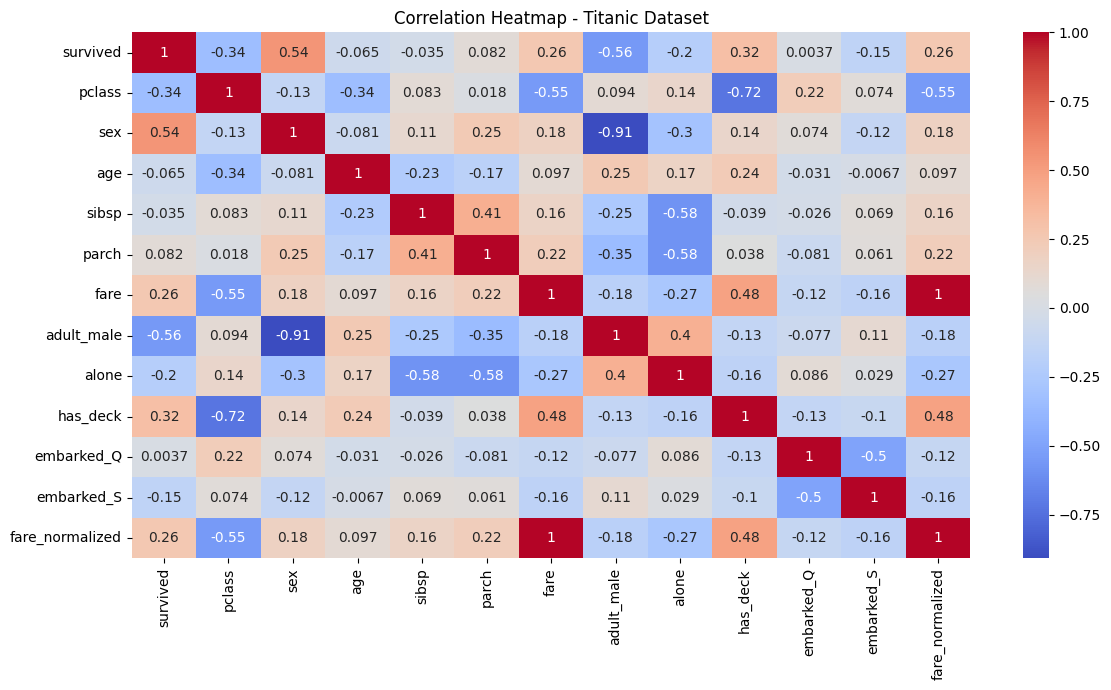

In [21]:
plt.figure(figsize=(12, 7))

corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap - Titanic Dataset")
plt.tight_layout()
plt.savefig("../images/correlation_heatmap.png")
plt.show()

# Correlation Heatmap Interpretation

- Survival has strong positive correlation with Sex (female survival higher).
- Survival has negative correlation with Pclass (higher class number = lower survival).
- Fare positively correlates with survival.
- Age has weak negative correlation with survival.
- SibSp and Parch show slight relationship.

The cleaned dataset is now fully numeric, contains no missing values, and is suitable for machine learning or statistical modeling.

## Export Cleaned Dataset

In [22]:
df.to_csv("../data/titanic_cleaned.csv", index=False)

# Data Quality Report – Titanic Dataset Cleaning

## => Initial Data Issues Identified

After inspecting the dataset, the following issues were found:

- Missing values in:
  - Age (177 missing values)
  - Deck (688 missing values)
  - Embarked (2 missing values)
  - Embark_town (2 missing values)

- Categorical variables not encoded:
  - Sex
  - Embarked
  - Class
  - Who
  - Alive

- Boolean variables stored as True/False:
  - adult_male
  - alone

- Fare values not scaled (large range variation)

- Redundant / duplicate information:
  - class duplicates pclass
  - alive duplicates survived
  - embark_town duplicates embarked

---

## => Cleaning Steps Performed

### -> Missing Value Treatment
- Age filled using Median (robust to skewness)
- Deck converted into binary feature (has_deck)
- Embarked filled using Mode
- Embark_town filled using Mode

### -> Encoding
- Sex encoded using Label Encoding (male=0, female=1)
- Embarked encoded using One-Hot Encoding
- Boolean variables converted to integers (0/1)

### -> Feature Scaling
- Fare normalized using Min-Max Scaling (0 to 1 range)

### -> Column Reduction
- Dropped redundant columns: class, who, alive, embark_town

---

## => Improvements After Cleaning

- No missing values remain
- Dataset fully numeric and ML-ready
- Reduced redundancy and noise
- Fare values scaled properly
- Cabin information preserved via binary feature
- Improved interpretability via correlation heatmap

---

## => Final Result

The cleaned dataset is:
- Consistent
- Structured
- Ready for modeling
- Suitable for machine learning algorithms

File saved as:
`titanic_cleaned.csv`